<a href="https://colab.research.google.com/github/jtao22/PythonAI/blob/main/ImageClassifier/imageclassifierv1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Image classification using convolutional neural network
#Import
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential as seq
from keras.layers import Dense, Flatten, Conv2D, Dropout
from keras.layers import MaxPooling2D as mp2d 
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as pyplot
pyplot.style.use('fivethirtyeight')

In [3]:
#Upload data
from keras.datasets import cifar10
(trainX,trainY), (testX,testY) = cifar10.load_data()


170500096/170498071 [==============================] - 6s 0us/step


In [5]:
#get image classification
classification = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [6]:
#convert labels into set of number to put into neural network (one-hot encoding)
trainY1h = to_categorical(trainY)
testY1h = to_categorical(testY)

In [25]:
#normalize index values to be 0-1
trainX = trainX/255
testX = testX/255


numpy.ndarray

In [8]:
#create architecture
arch = seq()
#create NN
arch.add(Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3))) #first convolution layer
arch.add(mp2d(pool_size=(2,2))) # first pooling layer
arch.add(Conv2D(32, (5,5), activation='relu')) #second convolution layer
arch.add(mp2d(pool_size=(2,2))) # second pooling layer
arch.add(Flatten()) #flattening layer
arch.add(Dense(1024, activation='relu')) #1024 neuron layer
arch.add(Dropout(0.5)) #first dropout layer
arch.add(Dense(512, activation='relu')) #512 neuron layer
arch.add(Dropout(0.5)) #second dropout layer
arch.add(Dense(256, activation='relu')) #256 neuron layer
arch.add(Dense(10, activation='softmax')) #10 neuron layer
#compile
arch.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
#train
hist = arch.fit(trainX,trainY1h, batch_size=256, epochs=15, validation_split = 0.15, shuffle=True)

Epoch 1/15
167/167 [==============================] - 58s 346ms/step - loss: 0.2934 - accuracy: 0.8977 - val_loss: 1.1364 - val_accuracy: 0.7036
Epoch 2/15
167/167 [==============================] - 57s 339ms/step - loss: 0.2640 - accuracy: 0.9076 - val_loss: 1.0974 - val_accuracy: 0.6968
Epoch 3/15
167/167 [==============================] - 56s 335ms/step - loss: 0.2777 - accuracy: 0.9041 - val_loss: 1.3584 - val_accuracy: 0.6603
Epoch 4/15
167/167 [==============================] - 55s 331ms/step - loss: 0.2920 - accuracy: 0.8996 - val_loss: 1.3177 - val_accuracy: 0.6736
Epoch 5/15
167/167 [==============================] - 55s 331ms/step - loss: 0.3371 - accuracy: 0.8848 - val_loss: 1.1974 - val_accuracy: 0.6933
Epoch 6/15
167/167 [==============================] - 55s 332ms/step - loss: 0.2887 - accuracy: 0.8988 - val_loss: 1.3046 - val_accuracy: 0.6728
Epoch 7/15
167/167 [==============================] - 55s 330ms/step - loss: 0.3344 - accuracy: 0.8859 - val_loss: 1.1376 - val_ac

313/313 [==============================] - 5s 16ms/step - loss: 1.2737 - accuracy: 0.6910


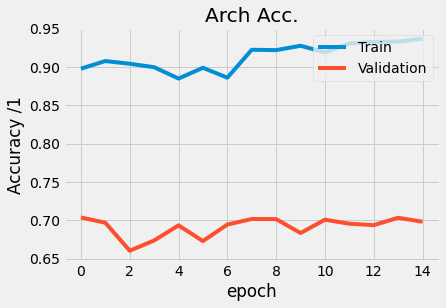

In [17]:
#check test data
arch.evaluate(testX,testY1h)[1]
#plot
pyplot.plot(hist.history['accuracy'])
pyplot.plot(hist.history['val_accuracy'])
pyplot.title('Arch Acc.')
pyplot.xlabel('epoch')
pyplot.ylabel('Accuracy /1')
pyplot.legend(['Train', 'Validation'], loc = 'upper right')
pyplot.show()

In [20]:
#code to test 
from google.colab import files
uploaded = files.upload()


Saving testing.jpg to testing.jpg


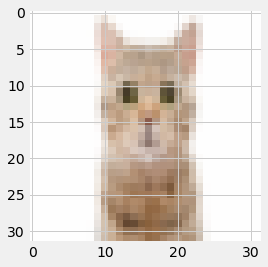

In [21]:
#structure input
image = pyplot.imread('testing.jpg')
from skimage.transform import resize
resized = resize(image,(32,32,3))
img = pyplot.imshow(resized)

In [51]:
#predict, order by likelihood
testing = np.array([resized])
testing = testing/255
predictions = arch.predict(testing)
max = 0
for i in range(len(predictions[0])):
  if (predictions[0][i] > predictions[0][max]):
    max = i

print(classification[max])

cat
